# Karam Hejazin

    ## Research question/interests

    Briefly describe your research question or interests here.
    
    Are players who have more aces or round clutches more likely to have a higher rank in Valorant?
    Does the number of flawless rounds a player has in an act correlate with their rank/winrate in Valorant?
   I will be collecting the data based on rank example, immortal/radiant, as well as win rate to find out how many statistics affect each individual game, and in the grand scheme things.

## Revised Research Question

Are there any specific weapons that are more likely to be used by higher-ranked players in Valorant?

Analysis
will need to calculate number of games played to ensure more accurate winrate



In [161]:
#imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [162]:
#Project Milestone 2

df = pd.read_csv('../data/raw/val_stats.csv', low_memory = False)

df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [163]:
#Project Milestone 3
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64813 non-null  object 
 1   name              85675 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  object 
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  object 
 11  kills             85678 non-null  object 
 12  deaths            85678 non-null  object 
 13  assists           85678 non-null  object 
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

In [164]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
damage_round,85678.0,142.815934,16.470485,0.0,132.800,142.00,151.80,340.6
headshot_percent,85678.0,23.599013,5.187779,0.0,20.000,23.30,26.80,83.3
aces,85678.0,1.058697,1.492623,0.0,0.000,1.00,2.00,24.0
clutches,85678.0,66.347254,53.117926,0.0,27.000,54.00,92.00,488.0
flawless,85678.0,39.112258,31.073547,0.0,16.000,32.00,55.00,316.0
kd_ratio,85678.0,1.053942,0.157280,0.0,0.960,1.04,1.13,6.5
kills_round,85678.0,0.758051,0.098120,0.0,0.700,0.80,0.80,2.0
most_kills,85678.0,28.164371,5.215834,0.0,25.000,28.00,31.00,58.0
score_round,85678.0,218.225829,26.331791,0.0,202.025,216.70,232.60,550.5
wins,85678.0,23.784904,18.365853,0.0,10.000,20.00,33.00,170.0


In [165]:
df.describe(include=[object, bool]).T

,count,unique,top,freq
region,64813,5,EU,32700
name,85675,78219,i miss her,27
tag,85358,33733,#NA1,1382
rating,85678,19,Immortal 1,51315
headshots,85678,2209,195,153
first_bloods,85678,698,30,670
kills,85678,3173,457,103
deaths,85678,3045,16,131
assists,85678,1237,100,278
agent_1,85678,19,Chamber,19502


In [166]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60747 entries, 20865 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            60747 non-null  object 
 1   name              60747 non-null  object 
 2   tag               60747 non-null  object 
 3   rating            60747 non-null  object 
 4   damage_round      60747 non-null  float64
 5   headshots         60747 non-null  object 
 6   headshot_percent  60747 non-null  float64
 7   aces              60747 non-null  int64  
 8   clutches          60747 non-null  int64  
 9   flawless          60747 non-null  int64  
 10  first_bloods      60747 non-null  object 
 11  kills             60747 non-null  object 
 12  deaths            60747 non-null  object 
 13  assists           60747 non-null  object 
 14  kd_ratio          60747 non-null  float64
 15  kills_round       60747 non-null  float64
 16  most_kills        60747 non-null  in

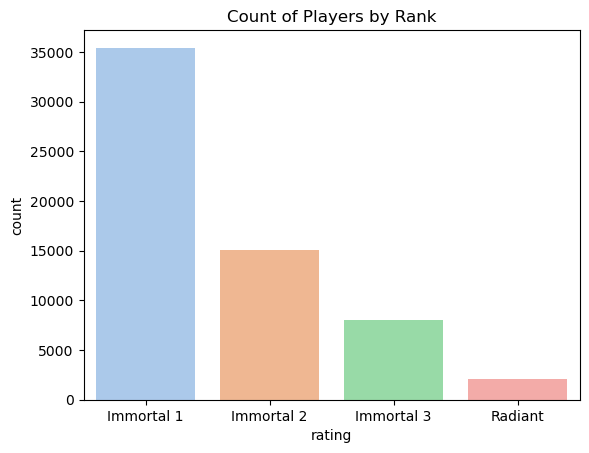

In [167]:
#this countplot shows the lack of data for lower ratings
value_counts = df['rating'].value_counts()

# I Decided to remove the ratings that have less than 10% players of the 35,000 Immortal 1
# Keep rows where the city column is not in to_remove
remove = value_counts[value_counts <= 1750].index
df = df[~df.rating.isin(remove)]


sns.countplot(x='rating', data=df, palette='pastel', order=df['rating'].value_counts().index)
plt.title('Count of Players by Rank')
plt.show()

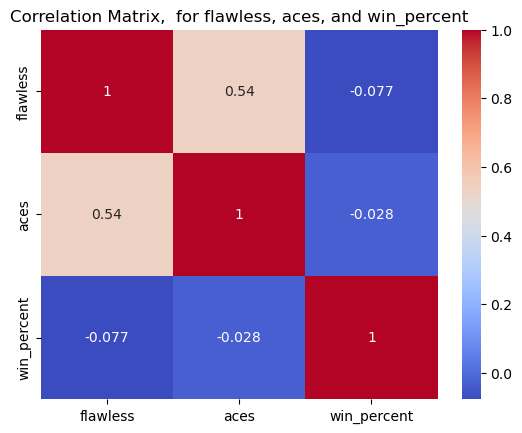

In [168]:
# select the columns of interest
cols = ['flawless', 'aces', 'win_percent']

# compute the correlation coefficients
corr_matrix = df[cols].corr()

# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix,  for flawless, aces, and win_percent')
plt.show()


Obs: 
* The 0.54 between aces and flawless means that players who have more flawless rounds are also likely to have more aces. However, it's important to note that correlation does not imply causation and there could be other factors affecting both of these variables.
* however, the most interesting part is the low correlation of -0.077 and -0.028 indicates a weak negative correlation between aces/flawless rounds and win percentage. This means that as the number of aces/flawless rounds increases, the win percentage tends to slightly decrease, but the relationship is not very strong. this could be due to cockiness, although that is likely wishful thinking and that it has nothing to do with the win percentage.


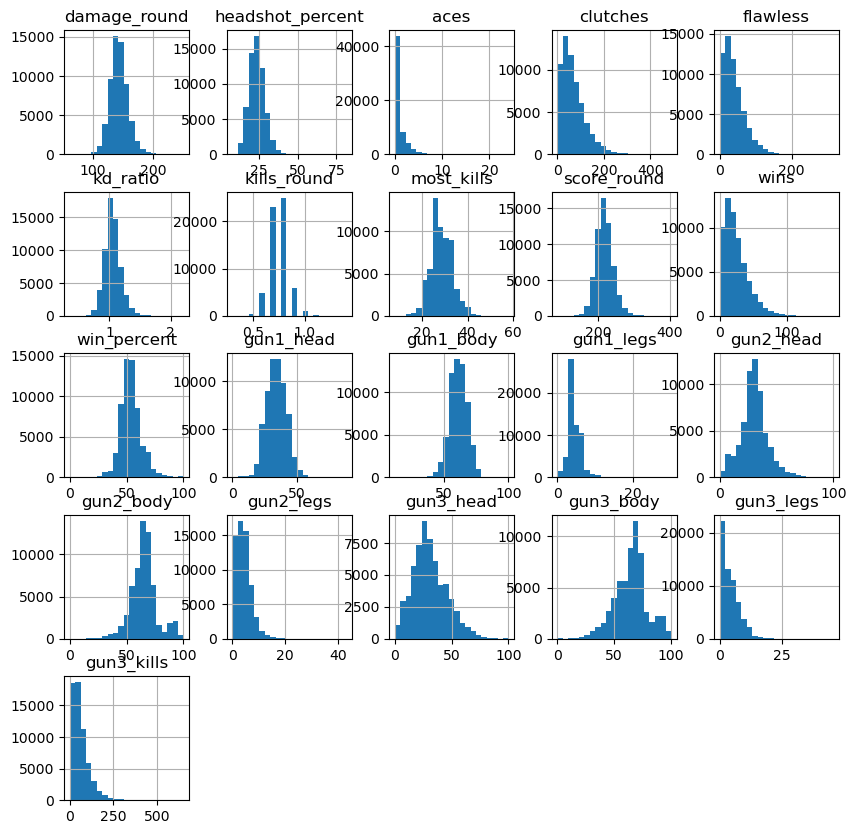

In [169]:
hist = df.hist(bins=21,figsize =(10,10))

Obs:
* this histogram shows all the data frequency in the dataset
* The distriution of kills by bodypart per gun is the most interesting it shows the difference in style of gun played

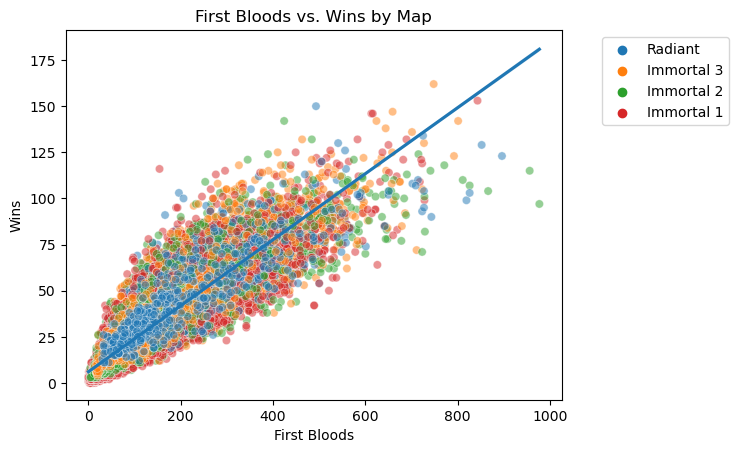

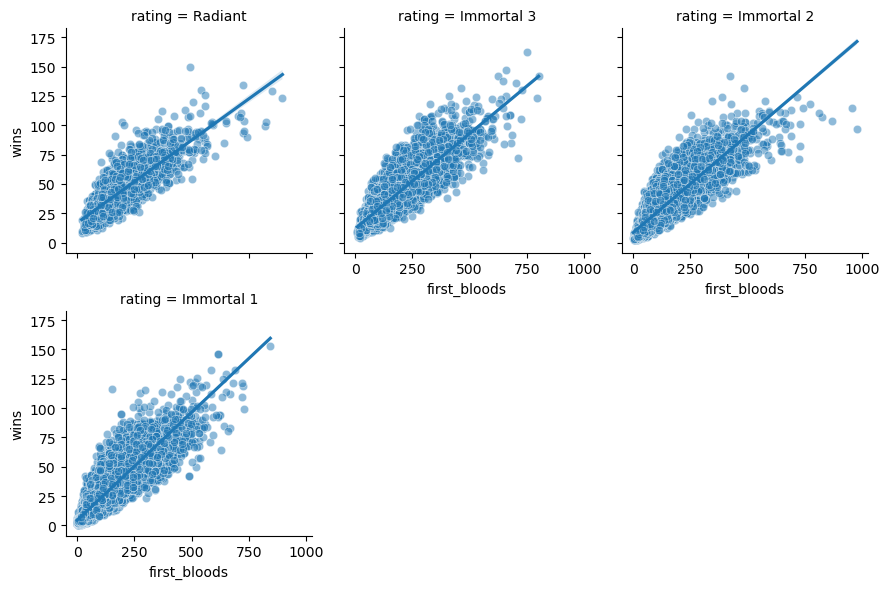

In [170]:
# create a scatter plot of first_bloods vs. wins, color-coded by rating
df['first_bloods'] = pd.to_numeric(df['first_bloods'], errors='coerce')

sns.scatterplot(x='first_bloods', y='wins', hue='rating', data=df, alpha=0.5)

# add a regression line to the plot
sns.regplot(x='first_bloods', y='wins', data=df, scatter=False)

# set the plot title and axis labels
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')

plt.title('First Bloods vs. Wins by Map')
plt.xlabel('First Bloods')
plt.ylabel('Wins')

# split the plot into subplots based on rating
g = sns.FacetGrid(df, col='rating', col_wrap=3)
g.map(sns.scatterplot, 'first_bloods', 'wins', alpha=0.5)
g.map(sns.regplot, 'first_bloods', 'wins', scatter=False)

# show the plot
plt.show()


Obs:
* On hindsight, I believe that win rate may have been better than wins, as it can eliminate all outliers, and give a more accurate representation of the data. This, however, can be useful to us, as we see how much more scattered image on the lower rating than the highest.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


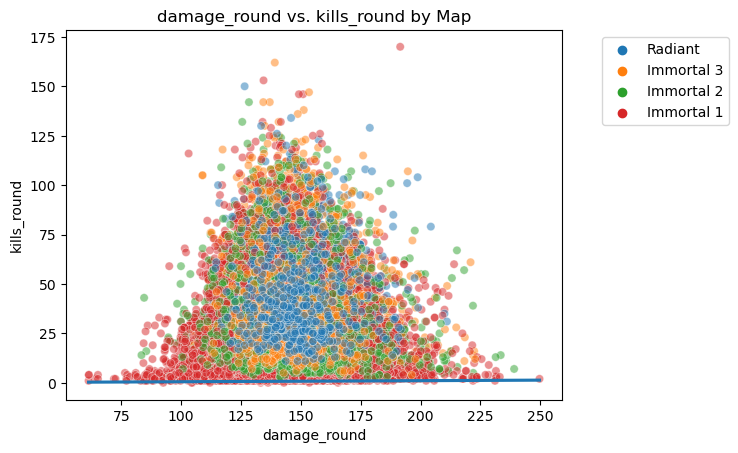

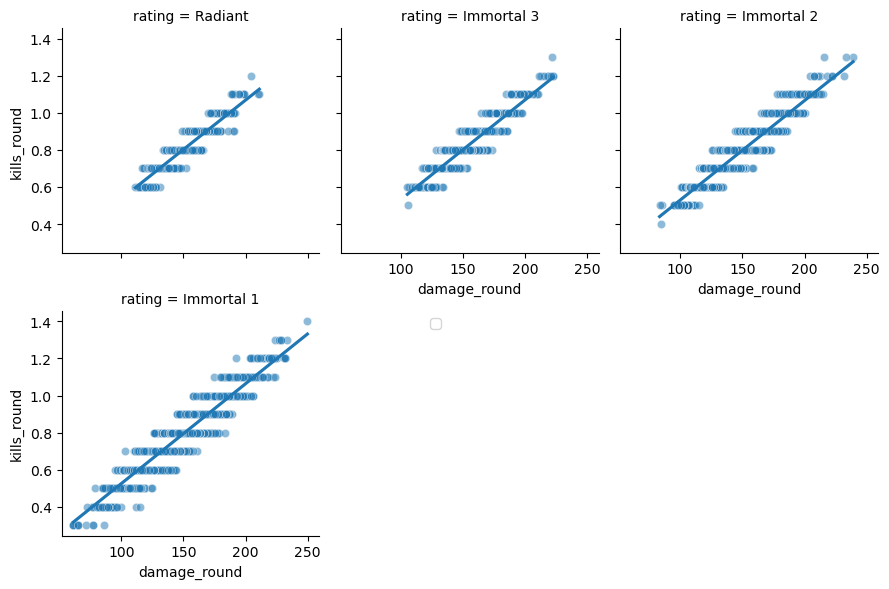

In [171]:
# create a scatter plot of damage_round vs. kills_round, color-coded by rating
df['damage_round'] = pd.to_numeric(df['damage_round'], errors='coerce')

sns.scatterplot(x='damage_round', y='wins', hue='rating', data=df, alpha=0.5)

# add a regression line to the plot
sns.regplot(x='damage_round', y='kills_round', data=df, scatter=False)

# set the plot title and axis labels
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.title('damage_round vs. kills_round by Map')
plt.xlabel('damage_round')
plt.ylabel('kills_round')

# split the plot into subplots based on rating
g = sns.FacetGrid(df, col='rating', col_wrap=3)
g.map(sns.scatterplot, 'damage_round', 'kills_round', alpha=0.5)
g.map(sns.regplot, 'damage_round', 'kills_round', scatter=False)

# show the plot
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()



Obs:
* it is clear that damage per round is important for winning, and that as we go through the ratings, the average damage per round seems to increase according to the graphs.
* We can probably assume that this has to do with the difference between top rating and the three ratings directly below, as they are the top 500 of their region
* this however may not be the best measure of ability

In [172]:
df.to_csv("../data/processed/processed_K.csv", index=False)

# Milestone 4

### Task 1

In [173]:
#imports

import pandas as pd
import numpy as np

In [174]:
#load
df = pd.read_csv('../data/raw/val_stats.csv', low_memory = False)
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [175]:
#clean
df.dropna(inplace=True)
df.drop(columns=['name', 'tag'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,Phantom,32,64,4,241,Ghost,46,52,1,135
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,Vandal,31,64,5,354,Spectre,25,72,4,105
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,Operator,7,92,1,462,Phantom,30,64,5,363
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,Sheriff,62,36,2,102,Ghost,51,46,4,95
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,Operator,9,90,2,241,Spectre,32,65,3,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,Vandal,28,69,2,175,Classic,39,59,2,71
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,Vandal,40,57,3,212,Spectre,33,63,5,139
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,Phantom,40,56,4,159,Operator,10,89,1,87
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [176]:
#process
value_counts = df['rating'].value_counts()

remove = value_counts[value_counts <= 1750].index
df = df[~df.rating.isin(remove)]
df.loc[:, 'num_games'] = (df['wins'] / (df['win_percent']/100)).round()



In [177]:
#wrangle
df = df.rename(columns={
    'rating': 'Rank',
    'kills': 'Kills',
    'deaths': 'Deaths',
    'kd_ratio': 'K/D',
    'assists': 'Assists',
    'headshots': 'Headshots',
    'headshot_percent': 'Headshot %',
    'wins': 'Wins',
    'gun1_name': 'Main_Gun',
    'region' : 'Region',
    'damage_round': 'Damage/Round',
    'kills_round': 'Kills/Round',
    'score_round': 'Score/Round',
    'win_percent': 'Win %',
    'first_bloods': 'First Bloods',
    'aces': 'Aces',
    'most_kills': 'Most Kills',
    'clutches': 'Clutches',
    'flawless': 'Flawless',
    'num_games': 'Games Played',
    'gun1_head': 'Headshots with Main Gun',
    'gun1_body': 'Bodyshots with Main Gun',
    'gun1_legs': 'Legshots with Main Gun',
    'gun1_kills': 'Kills with Main Gun',
    'gun2_name': 'Secondary_Gun',
    'gun2_head': 'Headshots with Secondary Gun',
    'gun2_body': 'Bodyshots with Secondary Gun',
    'gun2_legs': 'Legshots with Secondary Gun',
    'gun2_kills': 'Kills with Secondary Gun',
    'gun3_name': 'Tertiary_Gun',
    'gun3_head': 'Headshots with Tertiary Gun',
    'gun3_body': 'Bodyshots with Tertiary Gun',
    'gun3_legs': 'Legshots with Tertiary Gun',
    'gun3_kills': 'Kills with Tertiary Gun',
    'agent_1': 'Agent 1',
    'agent_2': 'Agent 2',
    'agent_3': 'Agent 3',
})
df

,Region,Rank,Damage/Round,Headshots,Headshot %,Aces,Clutches,Flawless,First Bloods,Kills,...,Headshots with Secondary Gun,Bodyshots with Secondary Gun,Legshots with Secondary Gun,Kills with Secondary Gun,Tertiary_Gun,Headshots with Tertiary Gun,Bodyshots with Tertiary Gun,Legshots with Tertiary Gun,Kills with Tertiary Gun,Games Played
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,32,64,4,241,Ghost,46,52,1,135,69.0
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,31,64,5,354,Spectre,25,72,4,105,73.0
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,7,92,1,462,Phantom,30,64,5,363,137.0
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,62,36,2,102,Ghost,51,46,4,95,85.0
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,9,90,2,241,Spectre,32,65,3,110,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,28,69,2,175,Classic,39,59,2,71,42.0
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,40,57,3,212,Spectre,33,63,5,139,40.0
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,40,56,4,159,Operator,10,89,1,87,50.0
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,39,57,3,37,Spectre,27,69,4,17,12.0


### Task 2

In [178]:
#Method Chaining
df1 = (
    pd.read_csv('../data/raw/val_stats.csv', low_memory=False)
      .dropna()
      .drop(columns=['name', 'tag'])
      .reset_index(drop=True)
      .assign(num_games=lambda x: (x['wins'] / (x['win_percent'] / 100)).round())
      .rename(columns={
          'rating': 'Rank',
          'kills': 'Kills',
          'deaths': 'Deaths',
          'kd_ratio': 'K/D',
          'assists': 'Assists',
          'headshots': 'Headshots',
          'headshot_percent': 'Headshot %',
          'wins': 'Wins',
          'gun1_name': 'Main_Gun',
          'region': 'Region',
          'damage_round': 'Damage/Round',
          'kills_round': 'Kills/Round',
          'score_round': 'Score/Round',
          'win_percent': 'Win %',
          'first_bloods': 'First Bloods',
          'aces': 'Aces',
          'most_kills': 'Most Kills',
          'clutches': 'Clutches',
          'flawless': 'Flawless',
          'num_games': 'Games Played',
          'gun1_head': 'Headshots with Main Gun',
          'gun1_body': 'Bodyshots with Main Gun',
          'gun1_legs': 'Legshots with Main Gun',
          'gun1_kills': 'Kills with Main Gun',
          'gun2_name': 'Secondary_Gun',
          'gun2_head': 'Headshots with Secondary Gun',
          'gun2_body': 'Bodyshots with Secondary Gun',
          'gun2_legs': 'Legshots with Secondary Gun',
          'gun2_kills': 'Kills with Secondary Gun',
          'gun3_name': 'Tertiary_Gun',
          'gun3_head': 'Headshots with Tertiary Gun',
          'gun3_body': 'Bodyshots with Tertiary Gun',
          'gun3_legs': 'Legshots with Tertiary Gun',
          'gun3_kills': 'Kills with Tertiary Gun',
          'agent_1': 'Agent 1',
          'agent_2': 'Agent 2',
          'agent_3': 'Agent 3',
        } )
)
value_counts = df1['Rank'].value_counts()
remove = value_counts[value_counts <= 1750].index
df1[~df1.Rank.isin(remove)]
df1


,Region,Rank,Damage/Round,Headshots,Headshot %,Aces,Clutches,Flawless,First Bloods,Kills,...,Headshots with Secondary Gun,Bodyshots with Secondary Gun,Legshots with Secondary Gun,Kills with Secondary Gun,Tertiary_Gun,Headshots with Tertiary Gun,Bodyshots with Tertiary Gun,Legshots with Tertiary Gun,Kills with Tertiary Gun,Games Played
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,32,64,4,241,Ghost,46,52,1,135,69.0
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,31,64,5,354,Spectre,25,72,4,105,73.0
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,7,92,1,462,Phantom,30,64,5,363,137.0
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,62,36,2,102,Ghost,51,46,4,95,85.0
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,9,90,2,241,Spectre,32,65,3,110,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,28,69,2,175,Classic,39,59,2,71,42.0
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,40,57,3,212,Spectre,33,63,5,139,40.0
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,40,56,4,159,Operator,10,89,1,87,50.0
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,39,57,3,37,Spectre,27,69,4,17,12.0


In [179]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df2 = (
          pd.read_csv('../data/raw/val_stats.csv', low_memory=False)
          .dropna()
          .drop(columns=['name', 'tag'])
          .reset_index(drop=True)
      )
    # Method Chain 2 (Create new columns, drop others, and do processing)
    value_counts = df2['rating'].value_counts()
    remove = value_counts[value_counts <= 1750].index

    df3 = (
          df2[~df2.rating.isin(remove)]
          .assign(num_games=lambda x: (x['wins'] / (x['win_percent'] / 100)).round())
          .rename(columns={
          'rating': 'Rank',
          'kills': 'Kills',
          'deaths': 'Deaths',
          'kd_ratio': 'K/D',
          'assists': 'Assists',
          'headshots': 'Headshots',
          'headshot_percent': 'Headshot %',
          'wins': 'Wins',
          'gun1_name': 'Main_Gun',
          'region': 'Region',
          'damage_round': 'Damage/Round',
          'kills_round': 'Kills/Round',
          'score_round': 'Score/Round',
          'win_percent': 'Win %',
          'first_bloods': 'First Bloods',
          'aces': 'Aces',
          'most_kills': 'Most Kills',
          'clutches': 'Clutches',
          'flawless': 'Flawless',
          'num_games': 'Games Played',
          'gun1_head': 'Headshots with Main Gun',
          'gun1_body': 'Bodyshots with Main Gun',
          'gun1_legs': 'Legshots with Main Gun',
          'gun1_kills': 'Kills with Main Gun',
          'gun2_name': 'Secondary_Gun',
          'gun2_head': 'Headshots with Secondary Gun',
          'gun2_body': 'Bodyshots with Secondary Gun',
          'gun2_legs': 'Legshots with Secondary Gun',
          'gun2_kills': 'Kills with Secondary Gun',
          'gun3_name': 'Tertiary_Gun',
          'gun3_head': 'Headshots with Tertiary Gun',
          'gun3_body': 'Bodyshots with Tertiary Gun',
          'gun3_legs': 'Legshots with Tertiary Gun',
          'gun3_kills': 'Kills with Tertiary Gun',
          'agent_1': 'Agent 1',
          'agent_2': 'Agent 2',
          'agent_3': 'Agent 3',
          }
      )
    )

    # Make sure to return the latest dataframe

    return df3


In [180]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import Karam as K
else:
    import sys
    sys.path.append("./code")
    import Karam as K

In [181]:
df = K.load_and_process('../data/raw/val_stats.csv')
df 

,Region,Rank,Damage/Round,Headshots,Headshot %,Aces,Clutches,Flawless,First Bloods,Kills,...,Headshots with Secondary Gun,Bodyshots with Secondary Gun,Legshots with Secondary Gun,Kills with Secondary Gun,Tertiary_Gun,Headshots with Tertiary Gun,Bodyshots with Tertiary Gun,Legshots with Tertiary Gun,Kills with Tertiary Gun,Games Played
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,32,64,4,241,Ghost,46,52,1,135,69.0
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,31,64,5,354,Spectre,25,72,4,105,73.0
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,7,92,1,462,Phantom,30,64,5,363,137.0
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,62,36,2,102,Ghost,51,46,4,95,85.0
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,9,90,2,241,Spectre,32,65,3,110,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,28,69,2,175,Classic,39,59,2,71,42.0
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,40,57,3,212,Spectre,33,63,5,139,40.0
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,40,56,4,159,Operator,10,89,1,87,50.0
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,39,57,3,37,Spectre,27,69,4,17,12.0


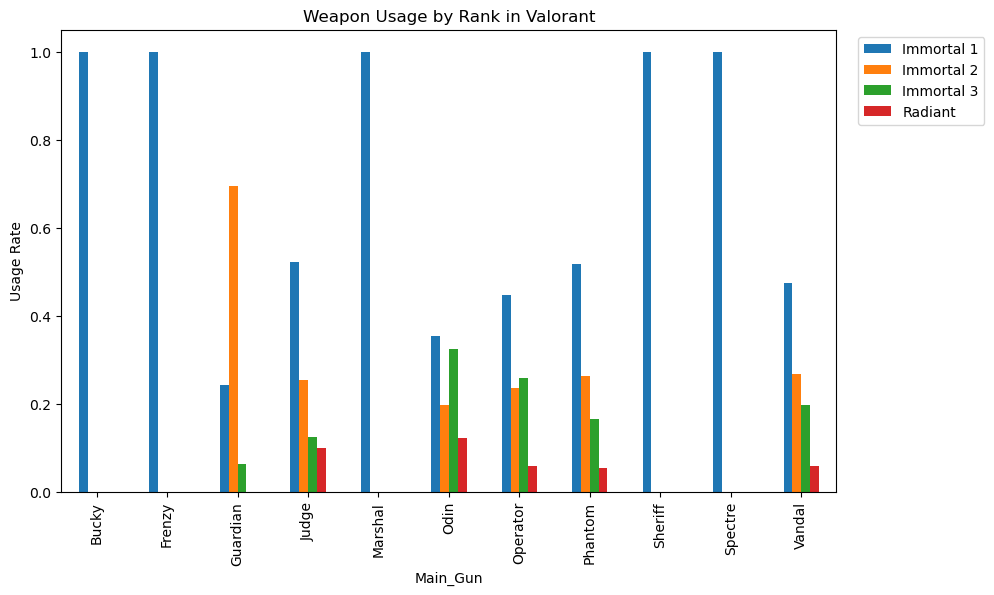

In [182]:
import pandas as pd

# Load the data and do basic cleaning
df

# Group the data by weapon and rank, and calculate the average usage rate
weapon_rank_usage = df.groupby(['Main_Gun', 'Rank'])['Games Played'].sum().reset_index()
weapon_usage = weapon_rank_usage.groupby('Main_Gun')['Games Played'].sum().reset_index()
weapon_rank_usage = pd.merge(weapon_rank_usage, weapon_usage, on='Main_Gun')
weapon_rank_usage['Usage Rate'] = weapon_rank_usage['Games Played_x'] / weapon_rank_usage['Games Played_y']

# Pivot the data to make it easier to compare across different ranks
weapon_rank_pivot = weapon_rank_usage.pivot(index='Main_Gun', columns='Rank', values='Usage Rate')

# Plot the usage rates for different ranks
weapon_rank_pivot.plot.bar(figsize=(10, 6))
plt.title('Weapon Usage by Rank in Valorant')
plt.ylabel('Usage Rate')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.show()



Obs 1: The Frenzy, Bucky, Sheriff, Marshal, and Spectre is rarely used by players in above immortal 1, indicating that it may not be a particularly effective weapon at higher levels of play, where every advantage counts.

Obs 2: Odin and judge seems to be the most common weapon used by the top 500 players, indicating that they may be the best in pro play and at the highest ranks

## Analysis
The data was cleaned by dropping irrelevant columns, removing rows with missing values, and filtering out players with suspicious names. A new column was created to calculate the number of games played, which was used to calculate more accurate win rates. Column names were also changed to make them more understandable and consistent.

Analyzing the data, it is evident that certain weapons are more commonly used by higher-ranked players in Valorant. The Frenzy, Bucky, Sheriff, Marshal, and Spectre are rarely used by players above the Immortal 1 rank, indicating that these weapons may not be effective at higher levels of play. In contrast, the Odin and Judge are the most commonly used weapons by the top 500 players, suggesting that these weapons are more effective in professional play and at the highest ranks of the game.

However, it is crucial to consider other factors such as individual player preferences, playstyles, specific maps, and situations in a match that may also contribute to a player's success. Incorporating these factors into the analysis can provide a more comprehensive understanding of what makes a successful Valorant player.

In conclusion, our analysis indicates that certain weapons are more likely to be used by higher-ranked players in Valorant. The Odin and Judge are commonly used by the top 500 players, while the Frenzy, Bucky, Sheriff, Marshal, and Spectre are rarely used by players above Immortal 1. These observations provide some insight into weapon effectiveness at different ranks, but they may not be a definitive indicator of the best weapons to use in all situations.